In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset1 = pd.read_csv('test_1.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=5.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=5.0)]
print(data_neg.shape)
print(data_pos.shape)

(26600, 22)
(6277, 22)


In [2]:
dataset = pd.read_csv('test.csv',delimiter = ',')
dataset1 = pd.read_csv('test_1.csv',delimiter = ',') # this one does not take care the CRAN before GH date
dataset = dataset.loc[dataset['proj_span'] >= 5.0]
dataset1 = dataset1.loc[dataset1['proj_span'] >= 5.0]

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(32877, 22)

In [4]:
X_1 = (dataset1.drop('class', axis=1)).drop('id', axis=1)
y_1 = dataset1['class']
dataset1.shape

(32877, 22)

In [5]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=20190101)

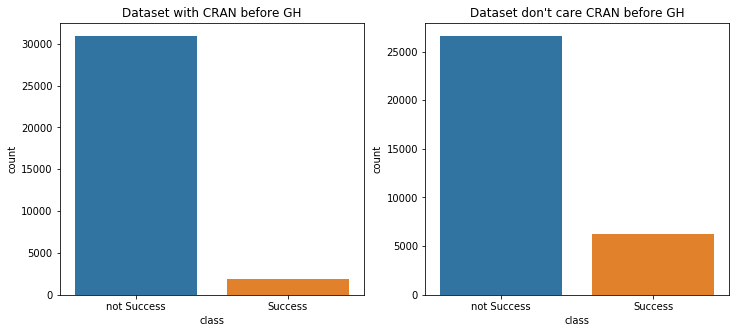

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [7]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.93830
Precision on train: 0.31818
Recall on train: 0.05224

Classification accuracy of the LogisticRegression classifier on test set: 0.93562
Precision on test: 0.34091
Recall on test: 0.04942


array([[9199,   58],
       [ 577,   30]])

In [8]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-9.72539243e-01 -3.64507935e-01  4.58604651e-02  7.08195259e-07
   1.18359031e-01  3.55040127e-01 -3.20922982e-01  2.16236987e-01
  -1.79283082e-02  2.08154440e-02  9.41599838e-03 -5.05226622e-02
  -3.56032359e-02  1.49593512e-02  3.84766867e-03 -5.86548682e-03
   1.59814111e-01  1.99024958e-03  3.58600052e-01  1.29245635e-03]]
[-2.496506]


In [9]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

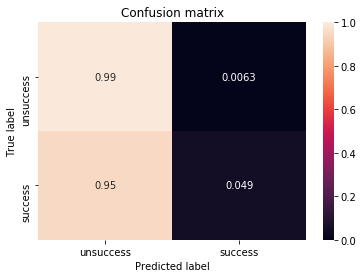

In [10]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [11]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.82540
Precision on train: 0.66004
Recall on train: 0.15300

Classification accuracy of the LogisticRegression classifier on test set: 0.82198
Precision on test: 0.70429
Recall on test: 0.16107


In [12]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-8.54236543e-01 -1.58617361e-01  1.65743679e-01  8.86336056e-07
  -3.16142529e-02  2.84762328e-01  2.39701370e-01 -1.52090882e-01
  -1.89157364e-02  1.66024691e-02  1.56964913e-02 -9.82890844e-02
  -6.45389833e-02  2.57867457e-03  1.72089342e-03 -1.62444459e-02
  -5.67307107e-02 -1.29835975e-02  1.84219049e-02  1.61756330e-03]]
[-1.60113027]


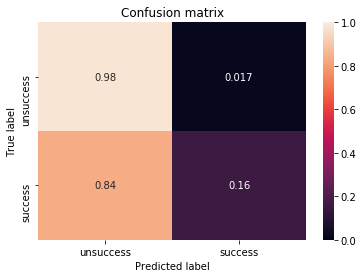

In [13]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [14]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

ss1 = StandardScaler()
ss1.fit(X_tr_1)
X_tr_1 = ss.transform(X_tr_1)
X_test_1 = ss.transform(X_test_1)

In [15]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.94090
Precision on train: 0.41071
Recall on train: 0.03433

Classification accuracy of the LogisticRegression classifier on test set: 0.93775
Precision on test: 0.39394
Recall on test: 0.02142


In [16]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-7.70050243e-02 -3.68748723e-01  5.13312122e-01  2.22629086e-01
   4.36030283e-02  4.70736274e-01 -7.42662797e-01 -6.60633684e-01
  -7.42903416e-02 -6.61199704e-03  1.31027211e-01 -8.11659060e-03
  -3.46652095e-02  4.60867315e-02  6.96988061e-04 -1.26630925e-01
  -5.08669551e-02  9.43516604e-03  7.91002588e-02  2.22629086e-01]]
[-3.03746952]


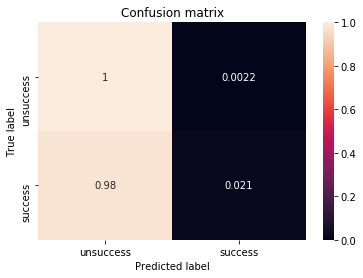

In [17]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [18]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.82662
Precision on train: 0.66603
Recall on train: 0.16175

Classification accuracy of the LogisticRegression classifier on test set: 0.82330
Precision on test: 0.71556
Recall on test: 0.16624


In [19]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.78750798 -1.37154571  1.81726223  0.20555847 -0.10277946  0.70923547
   0.75480792 -1.63399582 -0.124198    0.25915615  0.14961042 -0.15283222
  -0.17138906  0.04377015  0.03279279 -0.77776598 -0.18901733 -0.07232304
  -0.01011003  0.20555847]]
[-1.76300921]


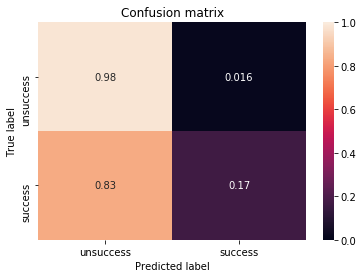

In [20]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9936123060878633
Precision on train: 0.99338
Recall on train: 0.89627

Accuracy score on the test dataset: 0.94029
Precision on test: 0.55357
Recall on test: 0.15321


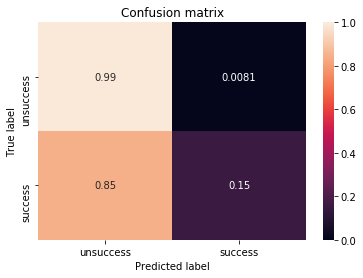

In [22]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [23]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. proj_span
3. normalized_proj_span
4. num_Push
5. num_Create
6. num_PullRequest
7. first_quater_teamsize
8. final_teamsize
9. num_Fork
10. num_Issues


In [24]:
# dataset_1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_1, y_tr_1)
y_pred = rf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
accuracy_score_train = rf.score(X_tr_1, y_tr_1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
accuracy_score_test = rf.score(X_test_1, y_test_1)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9813149089644984
Precision on train: 0.98463
Recall on train: 0.91521

Accuracy score on the test dataset: 0.86831
Precision on test: 0.73770
Recall on test: 0.51110


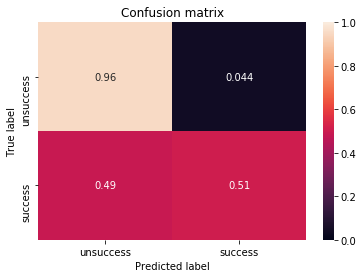

In [25]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [26]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. proj_span
3. normalized_proj_span
4. num_Push
5. num_Create
6. num_Delete
7. num_PullRequest
8. first_quater_teamsize
9. final_teamsize
10. num_Fork


In [27]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [28]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.94590
Radial Basis Function SVC classification accuracy on test set: 0.93846


In [29]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.97980
Recall on train: 0.07239
Precision on test: 0.50000
Recall on test: 0.00165


In [30]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_1, y_tr_1)
ca = svc_rbf.score(X_tr_1, y_tr_1)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test_1, y_test_1)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.85360
Radial Basis Function SVC classification accuracy on test set: 0.83952


In [31]:
y_pred = svc_rbf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Precision on train: 0.88019
Recall on train: 0.25899
Precision on test: 0.84570
Recall on test: 0.22354
